In [4]:
from sympy import *
init_printing()

In [5]:
xi, tau = symbols('xi tau', real=True)

In [6]:
z = lambda xi, tau: Rational(1,4)*(xi**2-tau**2)

In [7]:
z1, d1 = symbols('z1 d1', constant=True, real=True)
W = lambda z: z + z1 + z1*log(Abs(z/z1)) + d1

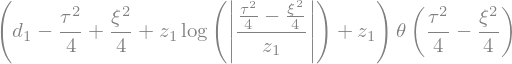

In [8]:
phi = lambda x, t: Heaviside(-z(x,t))*W(z(x,t))
phi(xi,tau)

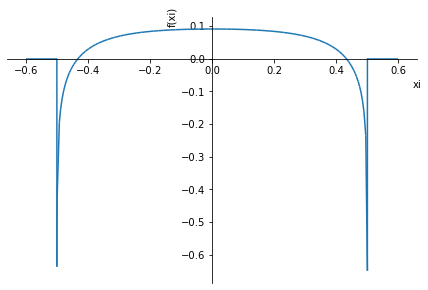

<function __main__.plotPhi(t_)>

In [9]:
z1_=0.1

d1_=0.1
t_=0.005

from ipywidgets import widgets

phiplot = phi(xi, tau).subs(z1,z1_).subs(d1,d1_)

def plotPhi(t_):
    plot(phiplot.subs(tau,t_), (xi,-1.2*t_, 1.2*t_))

widgets.interact(plotPhi, t_=(0.1,0.9,0.01))
    


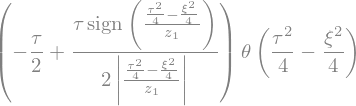

In [10]:
dphidt = Derivative(phi(xi, tau), tau).doit().args[0]
dphidt

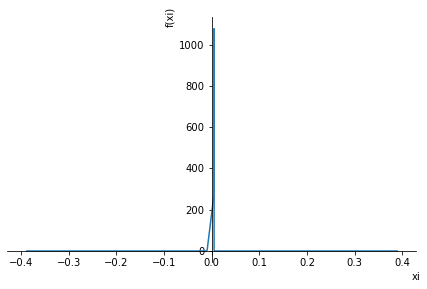

In [11]:
plot(dphidt.subs(tau, t_).subs(z1,z1_).subs(d1,d1_), (xi, -0.39, 0.39))

In [12]:
x=IndexedBase('x')
a0=symbols('a0', constant=True)
i, j, k=symbols('i j k', cls=Idx)

In [13]:
a_kp1 = lambda k: a0*product(x[i], (i, 1, kp1))
alpha_k = 1 + summation((-1)**i * product(1/x[k-j], (j,1,i)), (i,1,k-1))
alpha = lambda k_: alpha_k.subs(k, k_)

In [14]:
x_eqs = Eq(1 + 2*alpha(k)*log(x[k]), x[k])

In [ ]:
xk = []
for i in range(1,3):
    res = x_eqs.subs(k, i).doit()
    for x in xk:
        rhs, lhs = x.args
        res = res.subs(lhs, rhs).doit()
    xk.append(res)
    #pprint(res)

xk

In [16]:
x_eqs.subs(k,1).doit()

t = symbols('t')
beta = symbols('beta')
teq = Eq(t, 1+2*beta*log(t))
sol = solve(teq, t)[0]
teq
sol